#### Image Blending using Image Pyramids in OpenCV.
> Steps.
1. Firstly, load the images to be blended.
2. Calculate gaussian pyramids upto level n for each image.
3. Find laplacian pyramids using gaussian pyramids
4. Join the images at laplacian pyramid levels
5. Reconstruct the original image using joint image pyramids.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


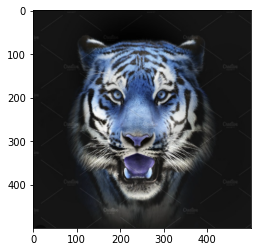

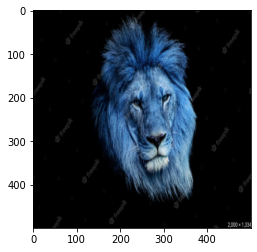

In [10]:
tiger = cv2.imread('tiger.png')
lion = cv2.imread('lion.png')
tiger = cv2.resize(tiger,(500,500))
lion = cv2.resize(lion,(500,500))
tiger1 = tiger.copy()
lion1 = lion.copy()
plt.imshow(tiger)
plt.show()
plt.imshow(lion)
plt.show()

In [11]:
#1. Generating gaussian pyramids for both lion and tiger
gaussian_pyramid_lion = [lion1]
gaussian_pyramid_tiger = [tiger1]

for i in range(6):
    lion1 = cv2.pyrDown(lion1)
    gaussian_pyramid_lion.append(lion1)
    tiger1 = cv2.pyrDown(tiger1)
    gaussian_pyramid_tiger.append(tiger1)


Start of level


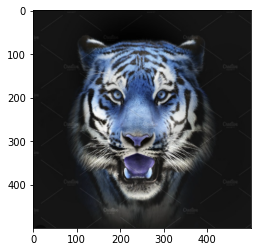

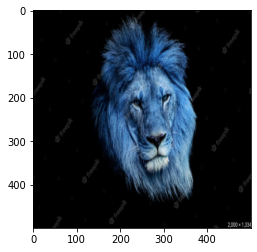

End of level
********************************
Start of level


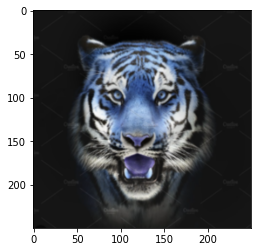

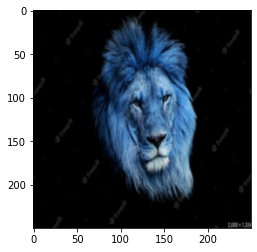

End of level
********************************
Start of level


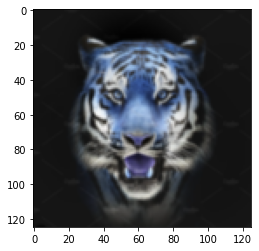

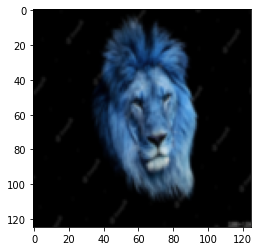

End of level
********************************
Start of level


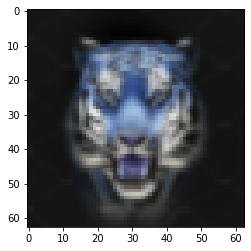

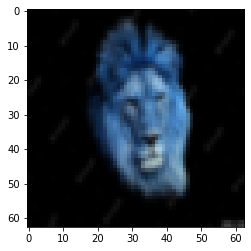

End of level
********************************
Start of level


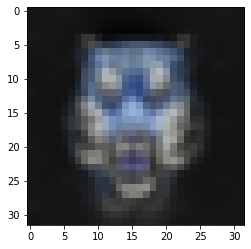

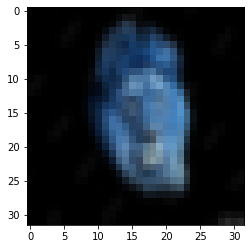

End of level
********************************
Start of level


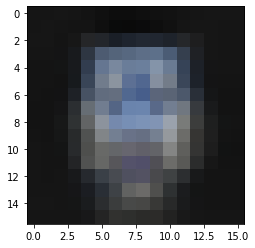

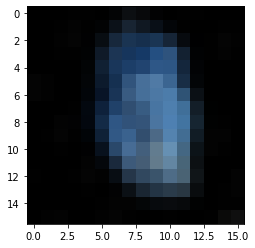

End of level
********************************
Start of level


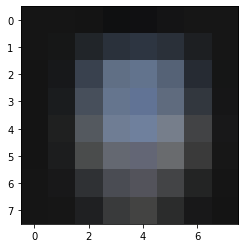

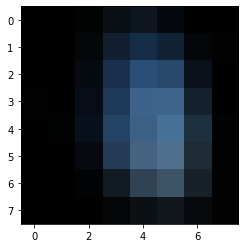

End of level
********************************


In [12]:
#displaying
for tiger_img, lion_img in zip(gaussian_pyramid_tiger,gaussian_pyramid_lion):
    print("Start of level")
    plt.imshow(tiger_img)
    plt.show()
    plt.imshow(lion_img)
    plt.show()
    print("End of level")
    print("********************************")

In [17]:
#generating laplacian pyramids for tiger
#creating laplacian pyramid
tiger1 = gaussian_pyramid_tiger[-1]
laplacian_pyramid_t = [tiger1]
for i in range(5,0,-1):
    size = (gaussian_pyramid_tiger[i - 1].shape[1], gaussian_pyramid_tiger[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyramid_tiger[i], dstsize=size)
    laplacian_t = cv2.subtract(gaussian_pyramid_tiger[i-1], gaussian_expanded)
    laplacian_pyramid_t.append(laplacian_t)

#generating laplacian pyramids for lion
lion1 = gaussian_pyramid_lion[-1]
laplacian_pyramid_l = [lion1]
for i in range(5,0,-1):
    size = (gaussian_pyramid_lion[i - 1].shape[1], gaussian_pyramid_lion[i - 1].shape[0])
    gaussian_expanded_l = cv2.pyrUp(gaussian_pyramid_lion[i], dstsize=size)
    laplacian_l = cv2.subtract(gaussian_pyramid_lion[i-1], gaussian_expanded_l)
    laplacian_pyramid_l.append(laplacian_l)



Start of level
(8, 8, 3)


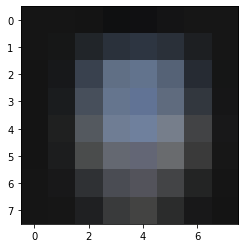

(8, 8, 3)


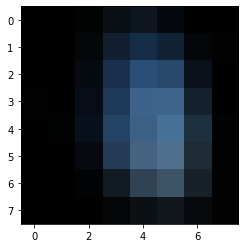

End of level
********************************
Start of level
(32, 32, 3)


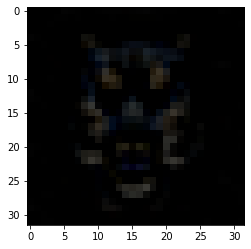

(32, 32, 3)


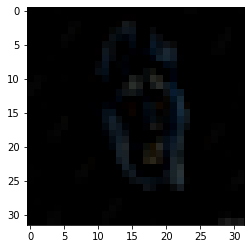

End of level
********************************
Start of level
(63, 63, 3)


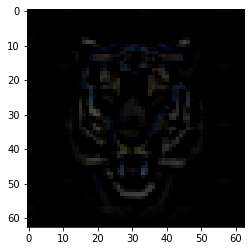

(63, 63, 3)


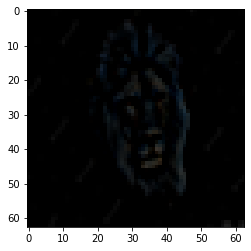

End of level
********************************
Start of level
(125, 125, 3)


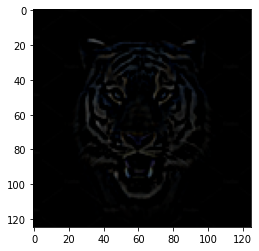

(125, 125, 3)


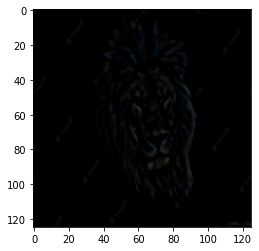

End of level
********************************
Start of level
(250, 250, 3)


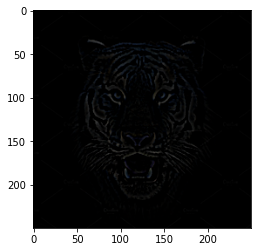

(250, 250, 3)


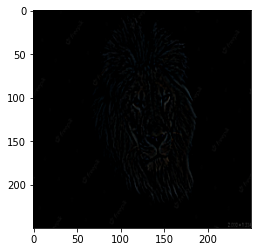

End of level
********************************
Start of level
(500, 500, 3)


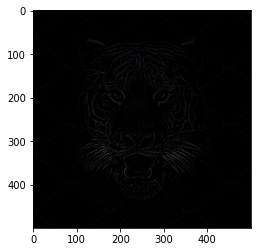

(500, 500, 3)


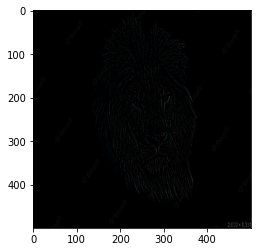

End of level
********************************


In [49]:
#displaying laplacians
#displaying
for tiger_img, lion_img in zip(laplacian_pyramid_t,laplacian_pyramid_l):
    print("Start of level")
    plt.imshow(tiger_img)
    print(np.shape(tiger_img))
    plt.show()
    plt.imshow(lion_img)
    print(np.shape(lion_img))
    plt.show()
    print("End of level")
    print("********************************")

In [50]:
combined_pyramid= []
n=0
for tiger_lap,lion_lap in zip(laplacian_pyramid_t,laplacian_pyramid_l):
    n+=1
    cols,rows,ch = tiger_lap.shape
    lap = np.hstack((tiger_lap[:,0:int(cols/2)], lion_lap[:,int(cols/2):]))
    combined_pyramid.append(lap)
    

Start of level


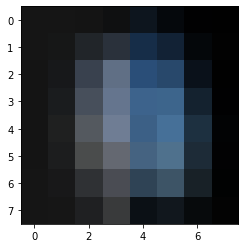

End of level
********************************
Start of level


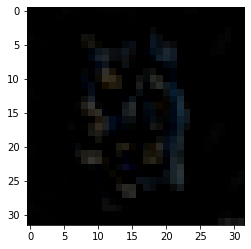

End of level
********************************
Start of level


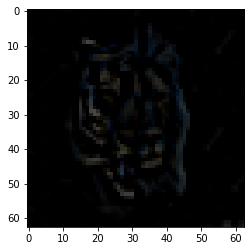

End of level
********************************
Start of level


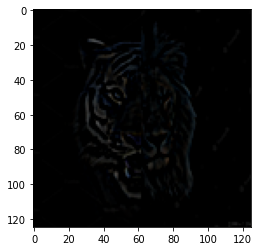

End of level
********************************
Start of level


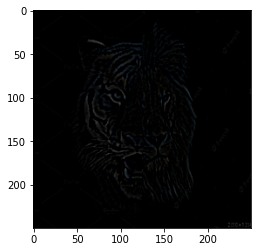

End of level
********************************
Start of level


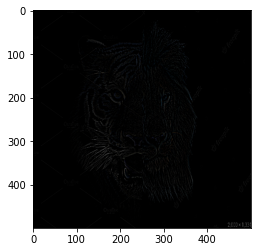

End of level
********************************


In [51]:
#displaying combined_laplacians
#displaying
for lap in combined_pyramid:
    print("Start of level")
    plt.imshow(lap)
    plt.show()
    print("End of level")
    print("********************************")

In [ ]:
#reconstructing by adding
